# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carolina Nuñez
- Nombre de alumno 2: Alonso Uribe

### **Link de repositorio de GitHub:** [Repositorio💻](https://github.com/carinunez/Labs_MDS/)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [30]:
# !pip install mlflow
# pip install feature_engine

In [31]:
import mlflow

from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import numpy as np
import pandas as pd


# Load data
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [32]:
print('Info dataset')
print('\nShape: ', data.shape)
print('\nInfo:')
print(data.info())
print('\n Valores nulos \n')
print(data.isnull().sum())

Info dataset

Shape:  (3276, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

 Valores nulos 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability         

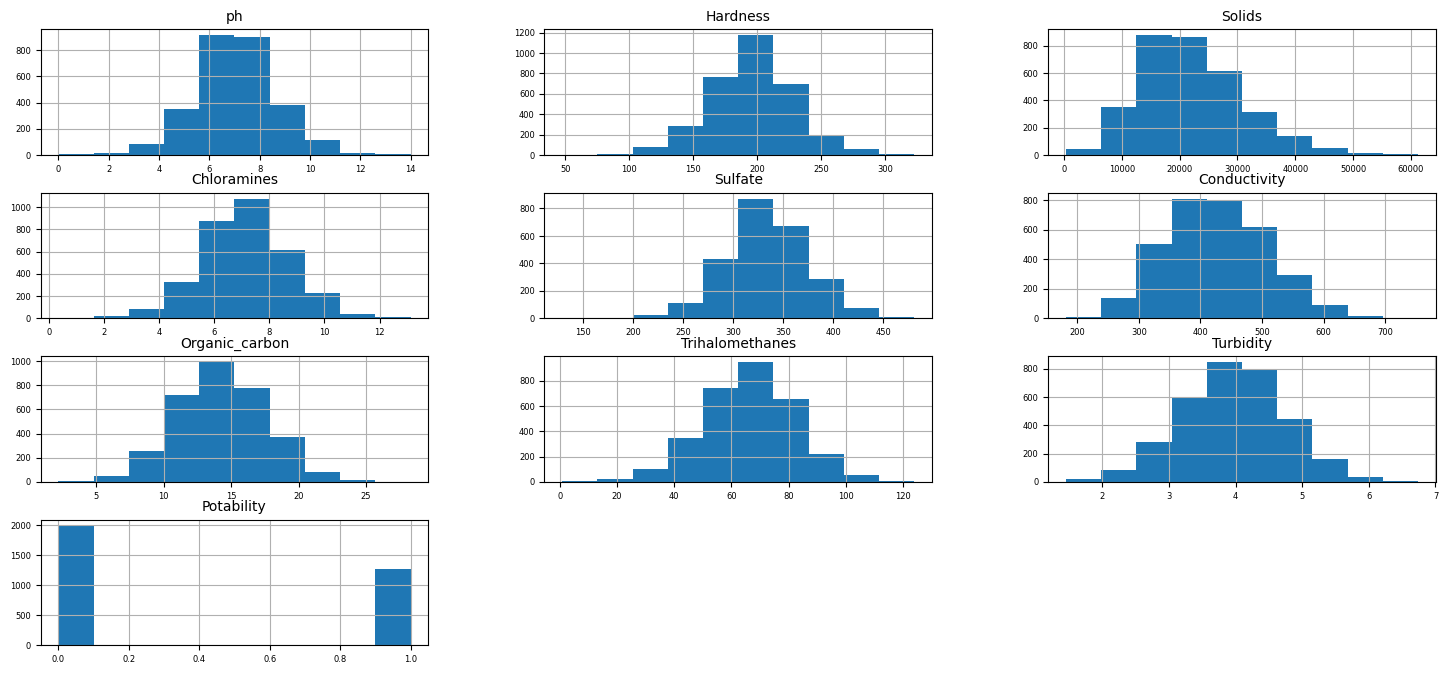

In [33]:
# Reviso comportamiento de las variables
axes = data.hist(figsize=(18, 8));
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=10)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

Dado que las variables parecen comportarse de manera gaussiana, se reemplazarán los valores nulos por la media de las variables, para evitar afectar la distribución de estas. 

In [34]:
col_nan = data.columns[data.isna().any()].tolist()
for col in col_nan:
    data.fillna({col: data[col].mean()}, inplace=True)

In [35]:
# Preprocesamiento
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

X = data.drop(columns='Potability').copy()
y = data.Potability.copy()

def fillna_df(df):
    for col in df.columns:
        df.fillna({col: df[col].mean()}, inplace=True)
    return df

cols_nan = X.columns[X.isna().any()].tolist()
standard_sc = ColumnTransformer([
                ('fillna', FunctionTransformer(fillna_df), cols_nan),
                ('standard', StandardScaler(), X.columns)])
X = standard_sc.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [37]:
# from feature_engine.selection import DropConstantFeatures

# transformer = DropConstantFeatures(tol=0.8)
# transformer.fit_transform(X_train)

# transformer.features_to_drop_

In [38]:
# from feature_engine.selection import SmartCorrelatedSelection

# corr_identifier = SmartCorrelatedSelection(
#     variables=None,
#     method="pearson",
#     threshold=0.8,
#     selection_method="variance",
#     estimator=None,
# )

# corr_identifier.fit_transform(X_train)
# print('correlacionadas: ',corr_identifier.correlated_feature_sets_)
# print('variable retenida: ', corr_identifier.correlated_feature_dict_)


Considerando una tolerancia de 0.8, es posible decir que ninguna variable se puede considerar constante o quasiconstante.

In [39]:
# pip install xgboost

In [40]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [41]:
# potability_exp = mlflow.set_experiment("potability_Models")

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def objective_function(trial):

    # Split into train and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(
                                            X, y, test_size=0.2, random_state=29, 
                                            shuffle=True)

    exp_name='XGBClassifier'
    mlflow.set_experiment(exp_name)

    # Hyperparameters to tune
    xgb_params = {
            "objective": "binary:logistic",
            "n_estimators": trial.suggest_int("n_estimators", 10, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            'max_leaves': trial.suggest_int("max_leaves", 3, 30),
            "grow_policy": trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
            "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),

            "n_jobs": trial.suggest_int('n_jobs', 1, 3),
            "gamma": trial.suggest_float("gamma", 0, 1),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        }


    # Train model
    model = XGBClassifier(seed=29, **xgb_params)
    model.fit( X_train, y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],)
    
    # Predict and evaluate the model
    yhat = model.predict(X_valid)
    f1 = f1_score(y_valid, yhat, average='weighted')
   
    with mlflow.start_run(run_name=f"XGB_con_lr_{xgb_params['learning_rate']:.5f}_n_estimators_{xgb_params['n_estimators']}_Mdepth_{xgb_params['max_depth']}_Mleaves_{xgb_params['max_leaves']}"):

        mlflow.log_params(xgb_params)
        mlflow.log_metric('valid_f1', f1)


    return f1

In [43]:
# pip install optuna
# pip install optuna-integration[xgboost]

In [44]:
# def optimize_model():
#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective_function, n_trials=10)

In [45]:
import optuna
from optuna.visualization import (plot_optimization_history, plot_param_importances, 
                                    plot_parallel_coordinate)
import pickle

In [46]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_function, n_trials=10)


[I 2024-11-28 03:06:11,264] A new study created in memory with name: no-name-f602a9a2-5a47-44a5-ac4d-6941cf60ae5b
2024/11/28 03:06:11 INFO mlflow.tracking.fluent: Experiment with name 'XGBClassifier' does not exist. Creating a new experiment.


[0]	validation_0-logloss:0.66829	validation_1-logloss:0.66488
[1]	validation_0-logloss:0.66743	validation_1-logloss:0.66443
[2]	validation_0-logloss:0.66611	validation_1-logloss:0.66367
[3]	validation_0-logloss:0.66471	validation_1-logloss:0.66282
[4]	validation_0-logloss:0.66345	validation_1-logloss:0.66209
[5]	validation_0-logloss:0.66274	validation_1-logloss:0.66166
[6]	validation_0-logloss:0.66139	validation_1-logloss:0.66091
[7]	validation_0-logloss:0.66016	validation_1-logloss:0.66006
[8]	validation_0-logloss:0.65931	validation_1-logloss:0.65961
[9]	validation_0-logloss:0.65832	validation_1-logloss:0.65919
[10]	validation_0-logloss:0.65747	validation_1-logloss:0.65879
[11]	validation_0-logloss:0.65663	validation_1-logloss:0.65834
[12]	validation_0-logloss:0.65575	validation_1-logloss:0.65798
[13]	validation_0-logloss:0.65448	validation_1-logloss:0.65710
[14]	validation_0-logloss:0.65359	validation_1-logloss:0.65688
[15]	validation_0-logloss:0.65257	validation_1-logloss:0.65641
[1

[I 2024-11-28 03:06:13,642] Trial 0 finished with value: 0.634369635942677 and parameters: {'n_estimators': 459, 'max_depth': 6, 'max_leaves': 23, 'grow_policy': 'depthwise', 'learning_rate': 0.01220029112652895, 'n_jobs': 1, 'gamma': 0.5410290293746326, 'min_child_weight': 5, 'subsample': 0.7424885952911424, 'colsample_bytree': 0.8794131678688979}. Best is trial 0 with value: 0.634369635942677.


🏃 View run XGB_con_lr_0.01220_n_estimators_459_Mdepth_6_Mleaves_23 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/9d2438b9c2bc4e55a0863336e9971ee6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66925	validation_1-logloss:0.66537
[1]	validation_0-logloss:0.66901	validation_1-logloss:0.66529
[2]	validation_0-logloss:0.66868	validation_1-logloss:0.66513
[3]	validation_0-logloss:0.66852	validation_1-logloss:0.66510
[4]	validation_0-logloss:0.66834	validation_1-logloss:0.66498
[5]	validation_0-logloss:0.66825	validation_1-logloss:0.66498
[6]	validation_0-logloss:0.66798	validation_1-logloss:0.66480
[7]	validation_0-logloss:0.66786	validation_1-logloss:0.66475
[8]	validation_0-logloss:0.66779	validation_1-logloss:0.66472
[9]	validation_0-logloss:0.66753	validation_1-logloss:0.66456
[10]	validation_0-logloss:0.66729	validation_1-logloss:0.66451
[11]	validation_0-logloss:0.66704	validation_1-logloss:0.66439
[12]	validati

[I 2024-11-28 03:06:14,160] Trial 1 finished with value: 0.4713253718305327 and parameters: {'n_estimators': 35, 'max_depth': 7, 'max_leaves': 4, 'grow_policy': 'lossguide', 'learning_rate': 0.009127924109270186, 'n_jobs': 2, 'gamma': 0.23839100738373853, 'min_child_weight': 2, 'subsample': 0.735282531023673, 'colsample_bytree': 0.530044979402434}. Best is trial 0 with value: 0.634369635942677.


🏃 View run XGB_con_lr_0.00913_n_estimators_35_Mdepth_7_Mleaves_4 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/ec000c5e7e994ed5b25e8d93b0883479
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66807	validation_1-logloss:0.66488
[1]	validation_0-logloss:0.66647	validation_1-logloss:0.66408
[2]	validation_0-logloss:0.66532	validation_1-logloss:0.66366
[3]	validation_0-logloss:0.66377	validation_1-logloss:0.66296
[4]	validation_0-logloss:0.66236	validation_1-logloss:0.66224
[5]	validation_0-logloss:0.66096	validation_1-logloss:0.66155
[6]	validation_0-logloss:0.65978	validation_1-logloss:0.66094
[7]	validation_0-logloss:0.65865	validation_1-logloss:0.66047
[8]	validation_0-logloss:0.65740	validation_1-logloss:0.65969
[9]	validation_0-logloss:0.65592	validation_1-logloss:0.65895
[10]	validation_0-logloss:0.65511	validation_1-logloss:0.65872
[11]	validation_0-logloss:0.65414	validation_1-logloss:0.65838
[12]	validation

[I 2024-11-28 03:06:15,554] Trial 2 finished with value: 0.6248369335503702 and parameters: {'n_estimators': 481, 'max_depth': 4, 'max_leaves': 24, 'grow_policy': 'depthwise', 'learning_rate': 0.022416871924556117, 'n_jobs': 3, 'gamma': 0.04985847184141445, 'min_child_weight': 2, 'subsample': 0.9724376878942244, 'colsample_bytree': 0.9381754420410588}. Best is trial 0 with value: 0.634369635942677.


🏃 View run XGB_con_lr_0.02242_n_estimators_481_Mdepth_4_Mleaves_24 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/bfda270bacba4702b21228f3a868e07b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66661	validation_1-logloss:0.66434
[1]	validation_0-logloss:0.66451	validation_1-logloss:0.66352
[2]	validation_0-logloss:0.66160	validation_1-logloss:0.66157
[3]	validation_0-logloss:0.65909	validation_1-logloss:0.66002
[4]	validation_0-logloss:0.65597	validation_1-logloss:0.65819
[5]	validation_0-logloss:0.65439	validation_1-logloss:0.65774
[6]	validation_0-logloss:0.65222	validation_1-logloss:0.65691
[7]	validation_0-logloss:0.64989	validation_1-logloss:0.65601
[8]	validation_0-logloss:0.64876	validation_1-logloss:0.65624
[9]	validation_0-logloss:0.64721	validation_1-logloss:0.65564
[10]	validation_0-logloss:0.64566	validation_1-logloss:0.65508
[11]	validation_0-logloss:0.64346	validation_1-logloss:0.65383
[12]	validati

[I 2024-11-28 03:06:17,559] Trial 3 finished with value: 0.6480020127871181 and parameters: {'n_estimators': 412, 'max_depth': 8, 'max_leaves': 15, 'grow_policy': 'depthwise', 'learning_rate': 0.033796565776427354, 'n_jobs': 1, 'gamma': 0.7467917874651838, 'min_child_weight': 3, 'subsample': 0.8448003428532054, 'colsample_bytree': 0.7022122287917628}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.03380_n_estimators_412_Mdepth_8_Mleaves_15 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/d985b97b2d46405491799af7ad32b70c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66593	validation_1-logloss:0.66350
[1]	validation_0-logloss:0.66346	validation_1-logloss:0.66252
[2]	validation_0-logloss:0.66045	validation_1-logloss:0.66128
[3]	validation_0-logloss:0.65617	validation_1-logloss:0.65971
[4]	validation_0-logloss:0.65395	validation_1-logloss:0.65835
[5]	validation_0-logloss:0.65233	validation_1-logloss:0.65807
[6]	validation_0-logloss:0.64914	validation_1-logloss:0.65679
[7]	validation_0-logloss:0.64576	validation_1-logloss:0.65566
[8]	validation_0-logloss:0.64442	validation_1-logloss:0.65432
[9]	validation_0-logloss:0.64149	validation_1-logloss:0.65311
[10]	validation_0-logloss:0.64051	validation_1-logloss:0.65314
[11]	validation_0-logloss:0.63941	validation_1-logloss:0.65285
[12]	validati

[I 2024-11-28 03:06:18,587] Trial 4 finished with value: 0.6428458879154383 and parameters: {'n_estimators': 318, 'max_depth': 3, 'max_leaves': 18, 'grow_policy': 'depthwise', 'learning_rate': 0.08418005499972574, 'n_jobs': 3, 'gamma': 0.5820614489736241, 'min_child_weight': 7, 'subsample': 0.8868802753222585, 'colsample_bytree': 0.8606831981702476}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.08418_n_estimators_318_Mdepth_3_Mleaves_18 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/994c24f879a2421fb38c2900f0e7df2d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66954	validation_1-logloss:0.66556
[1]	validation_0-logloss:0.66947	validation_1-logloss:0.66555
[2]	validation_0-logloss:0.66939	validation_1-logloss:0.66552
[3]	validation_0-logloss:0.66929	validation_1-logloss:0.66547
[4]	validation_0-logloss:0.66922	validation_1-logloss:0.66544
[5]	validation_0-logloss:0.66914	validation_1-logloss:0.66542
[6]	validation_0-logloss:0.66906	validation_1-logloss:0.66538
[7]	validation_0-logloss:0.66898	validation_1-logloss:0.66535
[8]	validation_0-logloss:0.66892	validation_1-logloss:0.66532
[9]	validation_0-logloss:0.66883	validation_1-logloss:0.66528
[10]	validation_0-logloss:0.66874	validation_1-logloss:0.66525
[11]	validation_0-logloss:0.66865	validation_1-logloss:0.66519
[12]	validati

[I 2024-11-28 03:06:19,307] Trial 5 finished with value: 0.4713253718305327 and parameters: {'n_estimators': 126, 'max_depth': 5, 'max_leaves': 6, 'grow_policy': 'depthwise', 'learning_rate': 0.002240567166193249, 'n_jobs': 2, 'gamma': 0.8788442580564585, 'min_child_weight': 4, 'subsample': 0.9020811653519727, 'colsample_bytree': 0.8450007709280652}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.00224_n_estimators_126_Mdepth_5_Mleaves_6 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/e78abf69e71b45969fce75b30ecb59ec
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66781	validation_1-logloss:0.66497
[1]	validation_0-logloss:0.66649	validation_1-logloss:0.66422
[2]	validation_0-logloss:0.66472	validation_1-logloss:0.66313
[3]	validation_0-logloss:0.66299	validation_1-logloss:0.66208
[4]	validation_0-logloss:0.66137	validation_1-logloss:0.66181
[5]	validation_0-logloss:0.66031	validation_1-logloss:0.66111
[6]	validation_0-logloss:0.65884	validation_1-logloss:0.66052
[7]	validation_0-logloss:0.65762	validation_1-logloss:0.66007
[8]	validation_0-logloss:0.65711	validation_1-logloss:0.65994
[9]	validation_0-logloss:0.65606	validation_1-logloss:0.65944
[10]	validation_0-logloss:0.65515	validation_1-logloss:0.65893
[11]	validation_0-logloss:0.65433	validation_1-logloss:0.65864
[12]	validatio

[I 2024-11-28 03:06:20,311] Trial 6 finished with value: 0.6120381871631574 and parameters: {'n_estimators': 250, 'max_depth': 7, 'max_leaves': 7, 'grow_policy': 'depthwise', 'learning_rate': 0.03434672594379169, 'n_jobs': 1, 'gamma': 0.7668409066384165, 'min_child_weight': 7, 'subsample': 0.7322089725804658, 'colsample_bytree': 0.7751397286545203}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.03435_n_estimators_250_Mdepth_7_Mleaves_7 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/29cf9445361d4b54a54cc4db40a9346d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66956	validation_1-logloss:0.66554
[1]	validation_0-logloss:0.66953	validation_1-logloss:0.66552
[2]	validation_0-logloss:0.66947	validation_1-logloss:0.66550
[3]	validation_0-logloss:0.66941	validation_1-logloss:0.66546
[4]	validation_0-logloss:0.66936	validation_1-logloss:0.66544
[5]	validation_0-logloss:0.66932	validation_1-logloss:0.66540
[6]	validation_0-logloss:0.66926	validation_1-logloss:0.66537
[7]	validation_0-logloss:0.66919	validation_1-logloss:0.66532
[8]	validation_0-logloss:0.66918	validation_1-logloss:0.66532
[9]	validation_0-logloss:0.66913	validation_1-logloss:0.66530
[10]	validation_0-logloss:0.66909	validation_1-logloss:0.66528
[11]	validation_0-logloss:0.66905	validation_1-logloss:0.66526
[12]	validatio

[I 2024-11-28 03:06:21,489] Trial 7 finished with value: 0.47826486364551246 and parameters: {'n_estimators': 392, 'max_depth': 9, 'max_leaves': 5, 'grow_policy': 'lossguide', 'learning_rate': 0.0011788644908723766, 'n_jobs': 1, 'gamma': 0.5422562509746415, 'min_child_weight': 2, 'subsample': 0.7170904109989535, 'colsample_bytree': 0.7707663223196598}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.00118_n_estimators_392_Mdepth_9_Mleaves_5 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/a4f28efc6bfc4a9598132826c37e2968
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66819	validation_1-logloss:0.66505
[1]	validation_0-logloss:0.66730	validation_1-logloss:0.66457
[2]	validation_0-logloss:0.66605	validation_1-logloss:0.66411
[3]	validation_0-logloss:0.66496	validation_1-logloss:0.66367
[4]	validation_0-logloss:0.66368	validation_1-logloss:0.66321
[5]	validation_0-logloss:0.66291	validation_1-logloss:0.66296
[6]	validation_0-logloss:0.66182	validation_1-logloss:0.66260
[7]	validation_0-logloss:0.66061	validation_1-logloss:0.66203
[8]	validation_0-logloss:0.66030	validation_1-logloss:0.66192
[9]	validation_0-logloss:0.65956	validation_1-logloss:0.66147
[10]	validation_0-logloss:0.65872	validation_1-logloss:0.66103
[11]	validation_0-logloss:0.65794	validation_1-logloss:0.66056
[12]	validatio

[I 2024-11-28 03:06:22,096] Trial 8 finished with value: 0.5647398888326551 and parameters: {'n_estimators': 131, 'max_depth': 5, 'max_leaves': 6, 'grow_policy': 'depthwise', 'learning_rate': 0.0300533292675336, 'n_jobs': 3, 'gamma': 0.5181758672426763, 'min_child_weight': 3, 'subsample': 0.5133865213452218, 'colsample_bytree': 0.7471590775368311}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.03005_n_estimators_131_Mdepth_5_Mleaves_6 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/9f8fe333722f43c0a1e1971f3879d522
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195
[0]	validation_0-logloss:0.66930	validation_1-logloss:0.66540
[1]	validation_0-logloss:0.66896	validation_1-logloss:0.66520
[2]	validation_0-logloss:0.66868	validation_1-logloss:0.66502
[3]	validation_0-logloss:0.66841	validation_1-logloss:0.66478
[4]	validation_0-logloss:0.66810	validation_1-logloss:0.66465
[5]	validation_0-logloss:0.66782	validation_1-logloss:0.66447
[6]	validation_0-logloss:0.66754	validation_1-logloss:0.66434
[7]	validation_0-logloss:0.66722	validation_1-logloss:0.66419
[8]	validation_0-logloss:0.66695	validation_1-logloss:0.66403
[9]	validation_0-logloss:0.66666	validation_1-logloss:0.66386
[10]	validation_0-logloss:0.66644	validation_1-logloss:0.66372
[11]	validation_0-logloss:0.66622	validation_1-logloss:0.66362
[12]	validatio

[I 2024-11-28 03:06:23,504] Trial 9 finished with value: 0.5696462956170915 and parameters: {'n_estimators': 360, 'max_depth': 6, 'max_leaves': 8, 'grow_policy': 'lossguide', 'learning_rate': 0.0044980219342016375, 'n_jobs': 3, 'gamma': 0.9033760176785817, 'min_child_weight': 1, 'subsample': 0.5854982998758622, 'colsample_bytree': 0.9652758162227887}. Best is trial 3 with value: 0.6480020127871181.


🏃 View run XGB_con_lr_0.00450_n_estimators_360_Mdepth_6_Mleaves_8 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/d8488db19d364f78bd641dd09b49004b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195


In [47]:
import os

# with mlflow.start_run():
#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective_function, n_trials=10)

# with mlflow.start_run():
# opti_history = plot_optimization_history(study)
# opti_history_path = os.path.join('plots', "plot_optimization_history.html")
# opti_history.write_html(opti_history_path) 
# mlflow.log_artifact(opti_history_path) 

# parallel_coordinate_plot = plot_parallel_coordinate(study)
# parallel_coordinate_path = os.path.join('plots', "parallel_coordinate.html")
# parallel_coordinate_plot.write_html(parallel_coordinate_path)  # Save the plot as HTML
# mlflow.log_artifact(parallel_coordinate_path)  # Log the plot as an artifact

# param_importance_plot = plot_param_importances(study)
# param_importance_path = os.path.join('plots', "param_importance.html")
# param_importance_plot.write_html(param_importance_path)  # Save the plot as HTML
# mlflow.log_artifact(param_importance_path)

- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [48]:
# Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")
    return best_model

In [49]:
from optuna.visualization import (plot_optimization_history, plot_param_importances, plot_parallel_coordinate)

In [56]:
def optimize_model():
    
    with mlflow.start_run():
        study = optuna.create_study()
        study.optimize(objective_function, n_trials=10, show_progress_bar=True)

    # opti_history = plot_optimization_history(study)
    # opti_history_path = os.path.join('plots', "plot_optimization_history.html")
    # opti_history.write_html(opti_history_path) 
    # mlflow.log_artifact(opti_history_path) 

    # parallel_coordinate_plot = plot_parallel_coordinate(study)
    # parallel_coordinate_path = os.path.join('plots', "parallel_coordinate.html")
    # parallel_coordinate_plot.write_html(parallel_coordinate_path)  # Save the plot as HTML
    # mlflow.log_artifact(parallel_coordinate_path)  # Log the plot as an artifact

    # param_importance_plot = plot_param_importances(study)
    # param_importance_path = os.path.join('plots', "param_importance.html")
    # param_importance_plot.write_html(param_importance_path)  # Save the plot as HTML
    # mlflow.log_artifact(param_importance_path)

    opti_history = plot_optimization_history(study)
    opti_history.show()
    opti_history.write_html("./plots/best_model.html")
    
    best_model = study.best_trial.user_attrs["best_model"]
    
    # Save best model to file
    
    with open('.models/best_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
        
    return best_model

In [57]:
optimize_model()

[I 2024-11-28 03:07:44,182] A new study created in memory with name: no-name-9d50ad7c-5284-4d78-9771-bc87e8600989
  0%|          | 0/10 [00:00<?, ?it/s]

[0]	validation_0-logloss:0.66813	validation_1-logloss:0.66479
[1]	validation_0-logloss:0.66716	validation_1-logloss:0.66452
[2]	validation_0-logloss:0.66576	validation_1-logloss:0.66382
[3]	validation_0-logloss:0.66492	validation_1-logloss:0.66354
[4]	validation_0-logloss:0.66389	validation_1-logloss:0.66294
[5]	validation_0-logloss:0.66315	validation_1-logloss:0.66261
[6]	validation_0-logloss:0.66208	validation_1-logloss:0.66165
[7]	validation_0-logloss:0.66144	validation_1-logloss:0.66148
[8]	validation_0-logloss:0.66098	validation_1-logloss:0.66143
[9]	validation_0-logloss:0.66000	validation_1-logloss:0.66110
[10]	validation_0-logloss:0.65903	validation_1-logloss:0.66091
[11]	validation_0-logloss:0.65817	validation_1-logloss:0.66068
[12]	validation_0-logloss:0.65738	validation_1-logloss:0.66045
[13]	validation_0-logloss:0.65683	validation_1-logloss:0.66039
[14]	validation_0-logloss:0.65591	validation_1-logloss:0.66006
[15]	validation_0-logloss:0.65444	validation_1-logloss:0.65917
[1

  0%|          | 0/10 [00:01<?, ?it/s]

[W 2024-11-28 03:07:46,171] Trial 0 failed with parameters: {'n_estimators': 435, 'max_depth': 9, 'max_leaves': 14, 'grow_policy': 'lossguide', 'learning_rate': 0.017697676779170505, 'n_jobs': 1, 'gamma': 0.7049109713594675, 'min_child_weight': 4, 'subsample': 0.6536476997935665, 'colsample_bytree': 0.5239012814394269} because of the following error: Exception('Run with UUID 3306df09b50244b584d632a5384361e9 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True').
Traceback (most recent call last):
  File "c:\Users\caron\.conda\envs\labs_env\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\caron\AppData\Local\Temp\ipykernel_45596\4248733404.py", line 40, in objective_function
    with mlflow.start_run(run_name=f"XGB_con_lr_{xgb_params['learning_rate']:.5f}_n_estimators_{xgb_params['n_estimators']}_Mdepth_{xgb_params['max_depth']

  0%|          | 0/10 [00:01<?, ?it/s]

🏃 View run grandiose-croc-679 at: http://127.0.0.1:5000/#/experiments/625043151356588195/runs/3306df09b50244b584d632a5384361e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/625043151356588195


Exception: Run with UUID 3306df09b50244b584d632a5384361e9 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [55]:
mlflow.end_run()

In [ ]:
# Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
plot_optimization_history(study).write_html("./plots/best_model.html")
# optuna_plots += plot_parallel_coordinate(study)
# optuna_plots

    # fig_optimization_history = plot_optimization_history(study)
    # fig_optimization_history.show()
    # fig_optimization_history.write_html("./plots/best_model.html")
optuna

FileNotFoundError: [Errno 2] No such file or directory: 'plots\\best_model.html'

In [ ]:
get_best_model(experiment_id='401658405638630677')

MlflowException: The following failures occurred while downloading one or more artifacts from http://127.0.0.1:5000/api/2.0/mlflow-artifacts/artifacts/401658405638630677/cfa8061ac25945389c8d54728ce7e7c4/artifacts:
##### File model #####
API request to http://127.0.0.1:5000/api/2.0/mlflow-artifacts/artifacts/401658405638630677/cfa8061ac25945389c8d54728ce7e7c4/artifacts/model failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow-artifacts/artifacts/401658405638630677/cfa8061ac25945389c8d54728ce7e7c4/artifacts/model (Caused by ResponseError('too many 500 error responses'))

In [ ]:
# Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.


In [ ]:
# Guardar las versiones de las librerías utilizadas** en el desarrollo.


In [ ]:
# Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

# *Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_r

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>